<a href="https://colab.research.google.com/github/DrumDong/Donggyu/blob/master/kaggle_fire_in_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
fire_amazon = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/forest-fires-in-brazil/amazon.csv',encoding='latin1')
fire_amazon.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [0]:
fire_amazon.isnull().any() # There is not null

year      False
state     False
month     False
number    False
date      False
dtype: bool

In [0]:
fire_amazon.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

In [0]:
fire_amazon.describe

<bound method NDFrame.describe of       year      state     month  number        date
0     1998       Acre   Janeiro     0.0  1998-01-01
1     1999       Acre   Janeiro     0.0  1999-01-01
2     2000       Acre   Janeiro     0.0  2000-01-01
3     2001       Acre   Janeiro     0.0  2001-01-01
4     2002       Acre   Janeiro     0.0  2002-01-01
...    ...        ...       ...     ...         ...
6449  2012  Tocantins  Dezembro   128.0  2012-01-01
6450  2013  Tocantins  Dezembro    85.0  2013-01-01
6451  2014  Tocantins  Dezembro   223.0  2014-01-01
6452  2015  Tocantins  Dezembro   373.0  2015-01-01
6453  2016  Tocantins  Dezembro   119.0  2016-01-01

[6454 rows x 5 columns]>

# Data Visualization

## fire number of each month

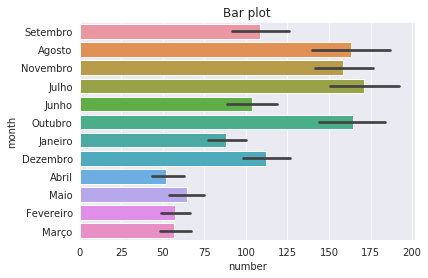

In [0]:
with sns.axes_style('darkgrid'):
  bars = sns.barplot(x='number',y='month',
                     data=fire_amazon.sort_values('number',ascending=False))
  bars.set_title('Bar plot')
plt.show()  

It is impossible to apply 'ascending=False'. 

So, I applyed a 'groupby()' for making DataFrame to make a graph.

In [0]:
month_graph=fire_amazon['number'].groupby(fire_amazon['month']).sum().reset_index(name='number')

In [0]:
month_graph

,month,number
0,Abril,28188.770
1,Agosto,88050.435
2,Dezembro,57535.480
3,Fevereiro,30848.050
4,Janeiro,47747.844
5,Julho,92326.113
6,Junho,56010.675
7,Maio,34731.363
8,Março,30717.405
9,Novembro,85508.054


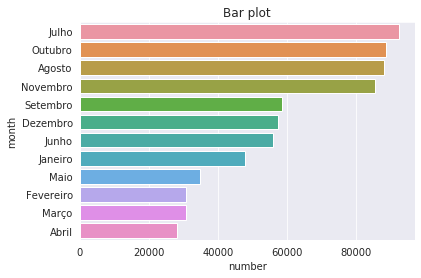

In [0]:
with sns.axes_style('darkgrid'):
  bars = sns.barplot(x='number',y='month',
                     data=month_graph.sort_values('number',ascending=False))
  bars.set_title('Bar plot')

## fire number of each state

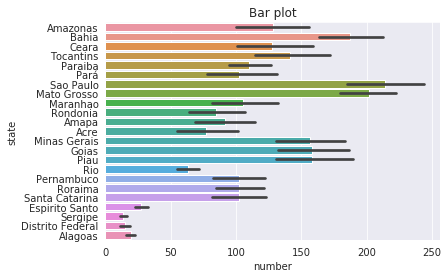

In [0]:
with sns.axes_style('darkgrid'):
  bars = sns.barplot(x='number',y='state',
                     data=fire_amazon.sort_values('number',ascending=False))
  bars.set_title('Bar plot')
plt.show()  

In [0]:
state_graph=fire_amazon['number'].groupby(fire_amazon['state']).sum().reset_index(name='number')
state_graph

,state,number
0,Acre,18464.030
1,Alagoas,4644.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


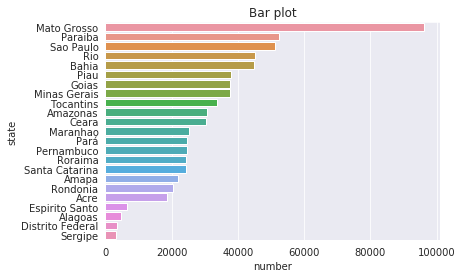

In [0]:
with sns.axes_style('darkgrid'):
  bars = sns.barplot(x='number',y='state',
                     data=state_graph.sort_values('number',ascending=False))
  bars.set_title('Bar plot')
plt.show() 

## Total fire in Amazon

In [0]:
total_number=fire_amazon['number'].groupby(fire_amazon['year']).sum().reset_index(name='total_number')
total_number

,year,total_number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600
5,2003,42760.674
6,2004,38453.163
7,2005,35004.965
8,2006,33832.161
9,2007,33037.413


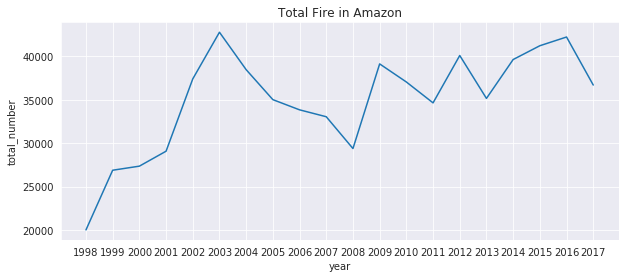

In [0]:
plt.figure(figsize=(10,4),facecolor='w')
with sns.axes_style('darkgrid'):
  lines = sns.lineplot(x='year',y='total_number',data=total_number)
  lines.set_title('Total Fire in Amazon')

plt.xticks(ticks=
           [1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])  
plt.show()

In [0]:
# Watch top 5 number of fire in every state
fire_number_state=fire_amazon['number'].groupby(fire_amazon['state']).sum().reset_index()
fire_number_state.sort_values(by='number',ascending=False).head()

,state,number
10,Mato Grosso,96246.028
12,Paraiba,52435.918
20,Sao Paulo,51121.198
16,Rio,45160.865
4,Bahia,44746.226


In [0]:
total_group_number=fire_amazon['number'].groupby([fire_amazon['year'],fire_amazon['state']]).sum().reset_index(name='total_number')
total_group_number

,year,state,total_number
0,1998,Acre,730.000
1,1998,Alagoas,86.000
2,1998,Amapa,278.000
3,1998,Amazonas,946.000
4,1998,Bahia,1224.687
...,...,...,...
455,2017,Roraima,1101.000
456,2017,Santa Catarina,2354.000
457,2017,Sao Paulo,2540.868
458,2017,Sergipe,75.000


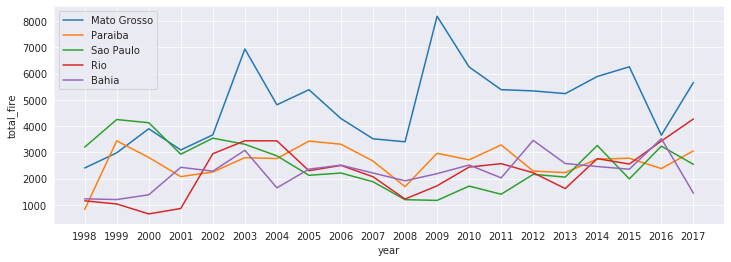

In [0]:
# total fire of top 5 state

plt.figure(figsize=(12,4),facecolor='w')
with sns.axes_style('darkgrid'):
  for kk in ['Mato Grosso','Paraiba','Sao Paulo','Rio','Bahia']:
    sns.lineplot(x='year',y='total_number',
                 label=kk,
                 data=total_group_number[total_group_number['state']==kk])
  
plt.xlabel("year")      #x축 이름 설정
plt.ylabel("total_fire")  #y축 이름 설정
plt.xticks(ticks=
           [1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017])  
plt.show()

# Make a new dataframe for analysis
- fire number has a difference on each state, but there is almost not difference on each month
- So, I will make a graph which means the hightest state on each month.

https://github.com/DrumDong/Donggyu/blob/master/%EC%A0%84%EC%B2%98%EB%A6%AC%EC%97%B0%EC%8A%B5/Pandas%EC%97%B0%EC%8A%B5.ipynb <참조>

In [0]:
fire_amazon.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [0]:
fire_amazon.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [0]:
new_dataframe=fire_amazon['number'].groupby([fire_amazon['month'],fire_amazon['state']]).sum().reset_index(name='number')
new_dataframe.head()

,month,state,number
0,Abril,Acre,41.0
1,Abril,Alagoas,245.0
2,Abril,Amapa,13.0
3,Abril,Amazonas,192.0
4,Abril,Bahia,2510.0


In [0]:
new_dataframe['month']

0         Abril
1         Abril
2         Abril
3         Abril
4         Abril
         ...   
271    Setembro
272    Setembro
273    Setembro
274    Setembro
275    Setembro
Name: month, Length: 276, dtype: object

In [0]:
new_dataframe['month']= new_dataframe['month'].map({'Janeiro':1,'Fevereiro':2,'Março':3,'Abril':4,
                                                    'Maio':5,'Junho':6,'Julho':7,'Agosto':8,
                                                    'Setembro':9,'Outubro':10,'Novembro':11,'Dezembro':12})

new_dataframe

,month,state,number
0,4,Acre,41.000
1,4,Alagoas,245.000
2,4,Amapa,13.000
3,4,Amazonas,192.000
4,4,Bahia,2510.000
...,...,...,...
271,9,Roraima,698.000
272,9,Santa Catarina,5649.339
273,9,Sao Paulo,9671.653
274,9,Sergipe,16.000


In [0]:
data_bargraph=new_dataframe['number'].groupby(new_dataframe['month']).max().reset_index()
data_bargraph

,month,number
0,1,10480.000
1,2,7456.050
2,3,9613.085
3,4,9952.770
4,5,10158.363
5,6,9069.000
6,7,9575.000
7,8,10163.736
8,9,10168.000
9,10,9923.363


In [0]:
# insert columns -> state name

data_bargraph['state'] = 'non'
for i in range(0,12):
  #new_dataframe[new_dataframe['number']==data_bargraph['number'][i]]
  kk=new_dataframe[new_dataframe['number']==data_bargraph['number'][i]]['state'].reset_index()
  data_bargraph['state'][i]=kk['state'][0]

data_bargraph

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,month,number,state
0,1,10480.000,Mato Grosso
1,2,7456.050,Mato Grosso
2,3,9613.085,Mato Grosso
3,4,9952.770,Mato Grosso
4,5,10158.363,Mato Grosso
5,6,9069.000,Maranhao
6,7,9575.000,Goias
7,8,10163.736,Paraiba
8,9,10168.000,Rio
9,10,9923.363,Mato Grosso


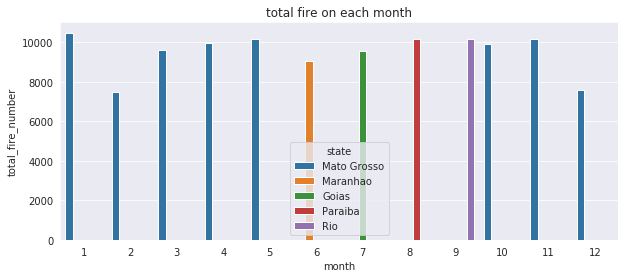

In [55]:
#total highest fire number on each month of every years
plt.figure(figsize=(10,4),facecolor='w')
with sns.axes_style('darkgrid'):
  sns.barplot(x='month',
              y='number',
              hue='state',data=data_bargraph)

plt.title('total fire on each month')
plt.xlabel("month")      #x축 이름 설정
plt.ylabel("total_fire_number")  #y축 이름 설정
plt.show()

# WHY?

In [0]:
new_dataframe

,month,state,number
0,4,Acre,41.000
1,4,Alagoas,245.000
2,4,Amapa,13.000
3,4,Amazonas,192.000
4,4,Bahia,2510.000
...,...,...,...
271,9,Roraima,698.000
272,9,Santa Catarina,5649.339
273,9,Sao Paulo,9671.653
274,9,Sergipe,16.000


In [0]:
# why is it impossible to compare???
new_dataframe[new_dataframe['number']==new_dataframe['number'].groupby(new_dataframe['month']).max()]['state']

ValueError: ignored